<a href="https://colab.research.google.com/github/LeeVander351/328-project/blob/master/Mini_Project__COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [18]:
Covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [47]:
Covid.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [48]:
Covid.mean()

fips          31.961318
cases     302534.059021
deaths      5878.390910
dtype: float64

In [20]:
Covid.shape

(29549, 5)

In [21]:
Covid.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [22]:
ny_covid = Covid[Covid['state']=='New York']

In [23]:
ny_covid.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [24]:
ny_covid.shape

(539, 5)

In [25]:
ny_covid.tail()

,date,state,fips,cases,deaths
29307,2021-08-17,New York,36,2211095,53519
29362,2021-08-18,New York,36,2215603,53532
29417,2021-08-19,New York,36,2220673,53548
29472,2021-08-20,New York,36,2224579,53564
29527,2021-08-21,New York,36,2230754,53601


In [50]:
#first death in NY
first_ny_death = ny_covid[ny_covid['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths,new_cases
669,2020-03-14,New York,36,610,2,189
722,2020-03-15,New York,36,732,6,122
775,2020-03-16,New York,36,950,10,218
828,2020-03-17,New York,36,1375,18,425
882,2020-03-18,New York,36,2387,32,1012


In [51]:
first_ny_death.tail()

,date,state,fips,cases,deaths,new_cases
29307,2021-08-17,New York,36,2211095,53519,3528
29362,2021-08-18,New York,36,2215603,53532,4508
29417,2021-08-19,New York,36,2220673,53548,5070
29472,2021-08-20,New York,36,2224579,53564,3906
29527,2021-08-21,New York,36,2230754,53601,6175


In [53]:
#total number of deaths
ny_covid['deaths'].max()

53601

#number of new cases for NY

In [56]:
ny_covid['new_cases'].max()

20184

In [58]:
# not a correct way of calculating total count bcoz data is cumulative
ny_covid['cases'].max()

2230754

Finding new covid 19 cases on daily basis (new cases added everyday)

In [62]:
#new cases for NY
# type(ny_covid['cases'])

newcase = []
previous_case = 0
for index, row in ny_covid.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [63]:
ny_covid['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
ny_covid.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [65]:
ny_covid['new_cases'].sum()

2230754

In [66]:
ny_cases = ny_covid['cases']
ny_deaths = ny_covid['deaths']
ny_dates = ny_covid['date']
ny_new_cases = ny_covid['new_cases']

In [36]:
type(ny_new_cases)

pandas.core.series.Series

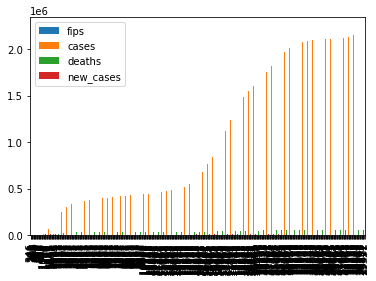

In [38]:
ny_covid.plot(kind='bar')

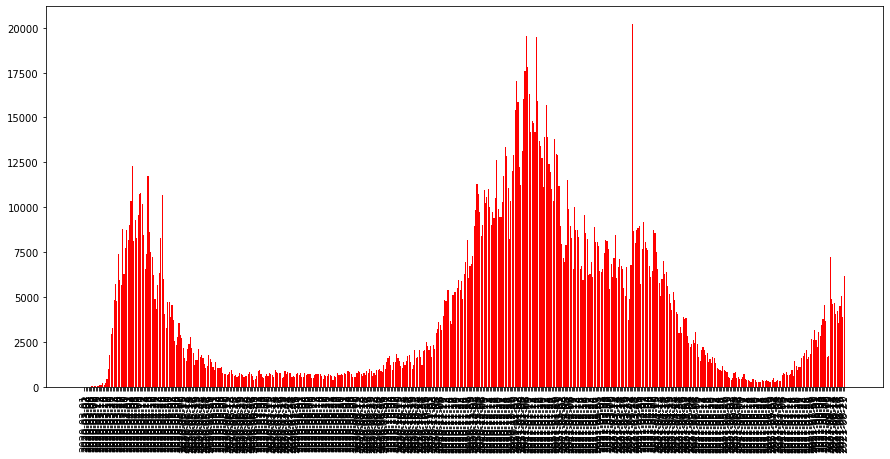

In [39]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [40]:
ny_cases_30 = ny_covid['cases'][-31:-1]
ny_deaths_30 = ny_covid['deaths'] [-31:-1]
ny_dates_30 = ny_covid['date'][-31:-1]
ny_new_cases_30 = ny_covid['new_cases'][-31:-1]

In [41]:
# ny_dates_30

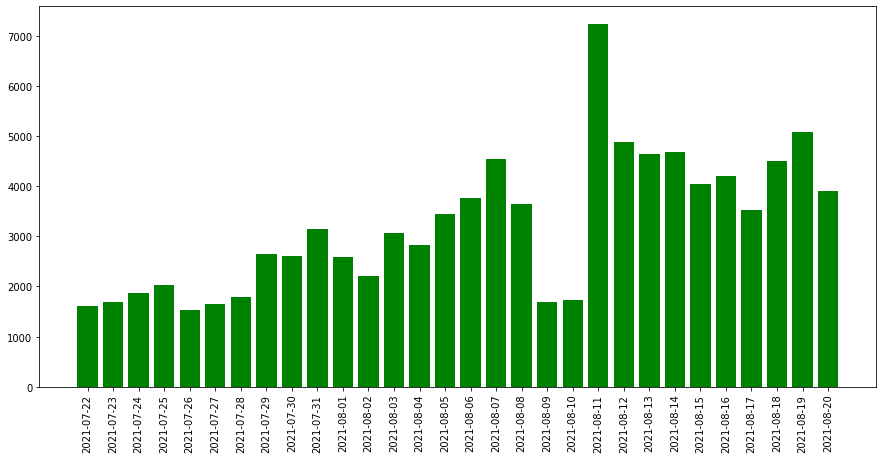

In [42]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='green')
plt.xticks(rotation=90)
plt.show()

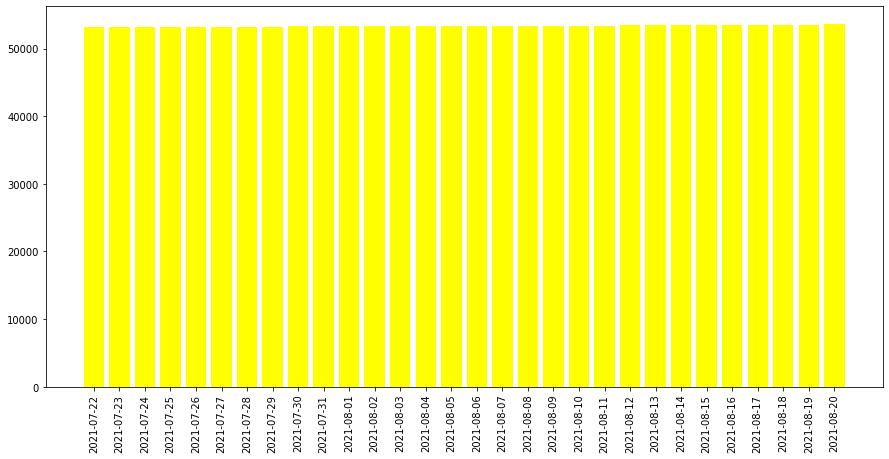

In [43]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='yellow')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [44]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

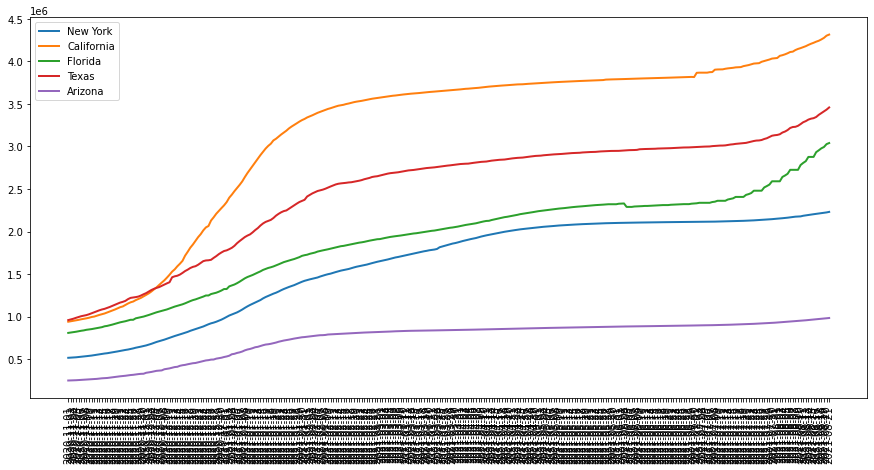

In [45]:
plt.figure(figsize=(15,7))
for state in states:
  covid_st = Covid[(Covid['state']==state) & (Covid['date']>='2020-11-01')]
  plt.plot(covid_st['date'],
           covid_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
The data concludes that New York is doing better than California and Florida in recorded new cases of Covid. 
2.   Conclusion 2
The data includes information on death totals from the disease. What we find is there is a increase in the total number of deaths where Covid has risen. 

